In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('~/spiced/nigela-network-encounter-notes/data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Description of the data
#--Categorical data = Pclass, Sex, SibSp(Sibling/spouse), Parch(Parent with child), Embarked
#--String = Name
#--Numerical data = Age, Fare

In [5]:
#replace 
##change variable sex into numerical 
##set 1 for male and 0 for female
#data['Sex_fact']=pd.factorize(data['Sex'])[0]
#data['Sex']=data['Sex'].replace('male', 1)
#data['Sex']=data['Sex'].replace('female', 0)
#data.head()


Data Exploration 

In [6]:
#number of survived/non-survived passenger
survived=data['Survived'].sum()
non_survived=len(data['Survived']) - survived
print (survived, non_survived)

342 549


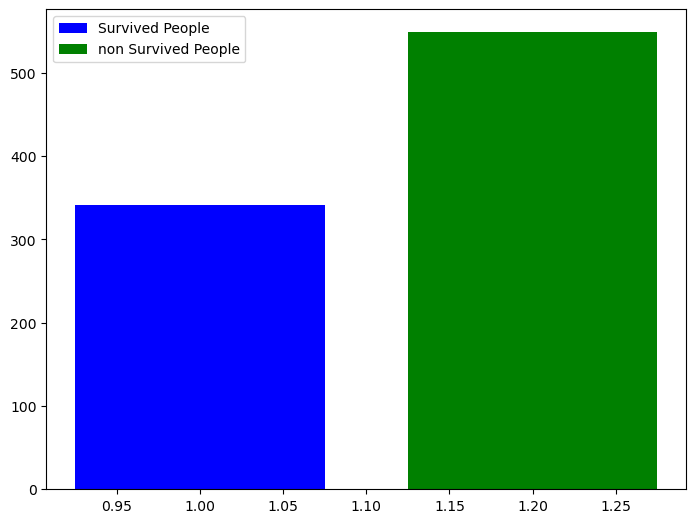

In [7]:
# Plot of survived/non survived passenger
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(1,survived, color = 'b', width = 0.15, label='Survived People')
ax.bar(1.2, non_survived, color = 'g', width = 0.15, label='non Survived People')
plt.legend()
plt.show()

In [8]:
#Toltal number of passenger in first class

firs_class=(data['Pclass']==1).sum()

In [9]:
#proportion of surviving 1st class passengers with regards to the total number of 1st class passengers
f_data=data[data['Pclass']==1]
prop_first_surv = ((f_data['Survived']==1).sum()/firs_class)*100

In [10]:
prop_first_surv

62.96296296296296

In [11]:
# bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [12]:
#histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

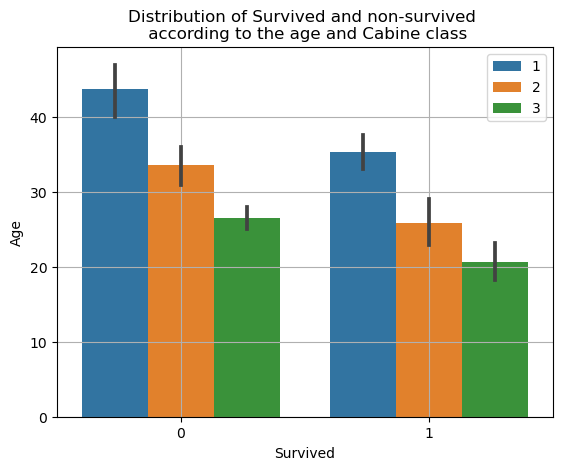

In [13]:
#data['Age'].hist()
fig = plt.figure()
sns.barplot(data=data, x='Survived', y='Age', hue='Pclass')
plt.title('Distribution of Survived and non-survived \n according to the age and Cabine class')
plt.legend()
plt.grid()

In [14]:
#average age for survived and drowned passengers
surv=data[data['Survived']==1]
non_sur=data[data['Survived']==0]

In [15]:
av_age_surv=round(surv['Age'].mean())
av_age_n_surv=round(non_sur['Age'].mean())

In [16]:
#av_age_surv

In [17]:
#av_age_n_surv

In [18]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Scatterplot of suvived non survived 

Text(0.5, 1.0, 'Age vs Fare distribution \n among Survived/nonSurvived')

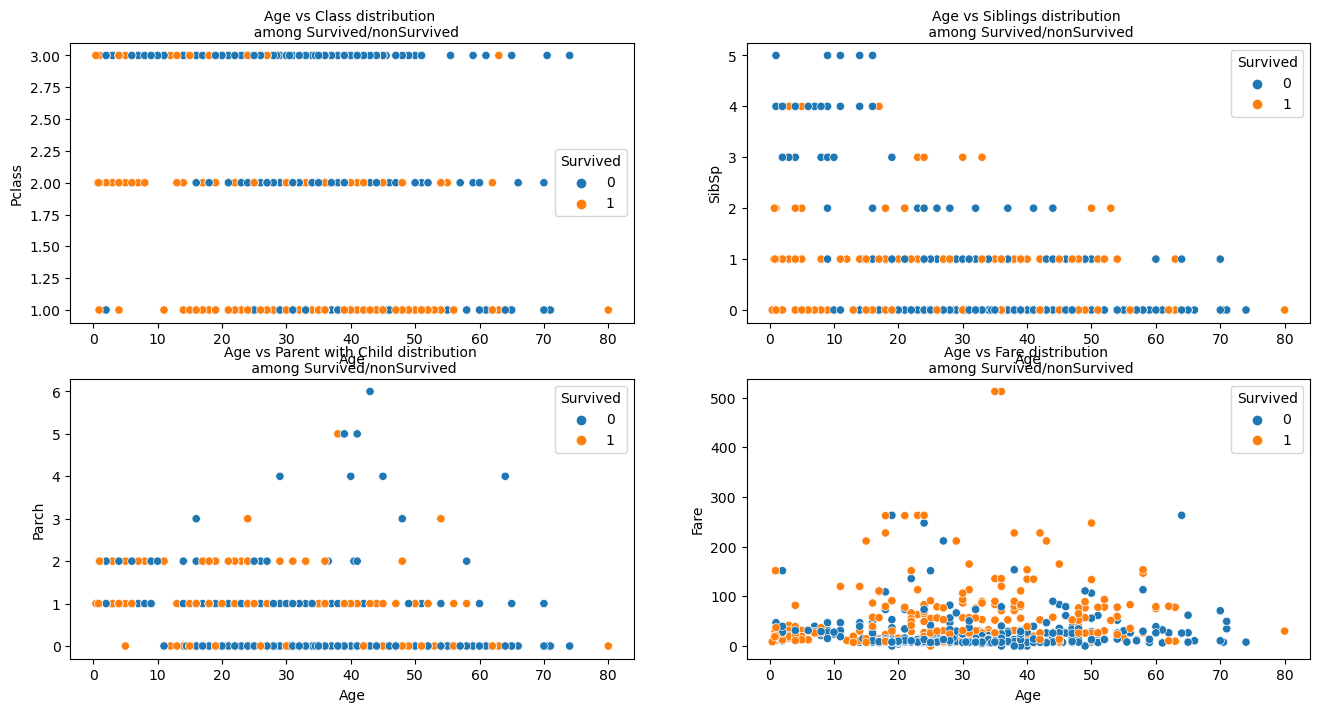

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
sns.scatterplot(ax=axes[0,0], x='Age', y='Pclass', data=data, hue='Survived')
axes[0,0].set_title('Age vs Class distribution \n  among Survived/nonSurvived', fontsize=10, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[0,1], x='Age', y='SibSp', data=data, hue='Survived')
axes[0,1].set_title('Age vs Siblings distribution \n among Survived/nonSurvived', fontsize=10, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[1,0], x='Age', y='Parch', data=data, hue='Survived')
axes[1,0].set_title('Age vs Parent with Child distribution \n among Survived/nonSurvived', fontsize=10, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[1,1], x='Age', y='Fare', data=data, hue='Survived')
axes[1,1].set_title('Age vs Fare distribution \n among Survived/nonSurvived', fontsize=10, loc = 'center', wrap=True)

Text(0.5, 1.0, 'Fare vs Class distribution \n among Survived/nonSurvived')

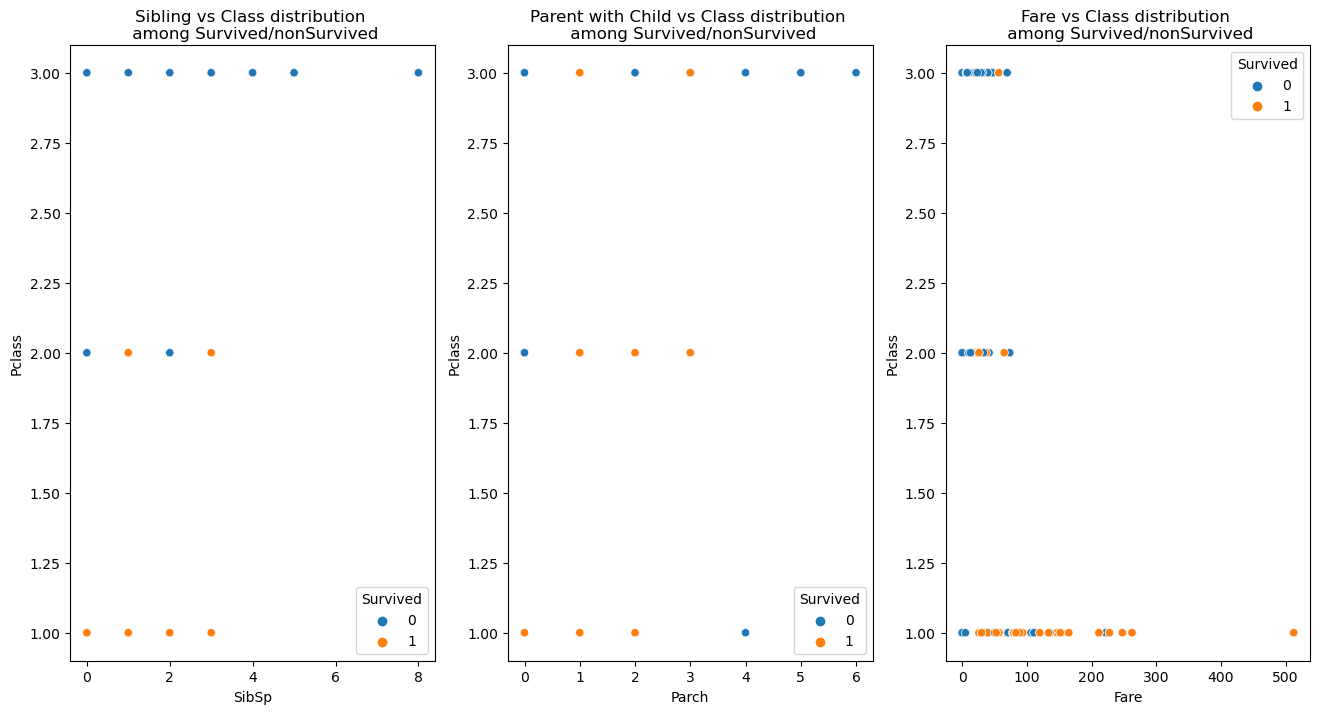

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(16,8))
#sns.scatterplot(ax=axes[0,0], x='Pclass', y='Age', data=data, hue='Survived')
sns.scatterplot(ax=axes[0], x='SibSp', y='Pclass', data=data, hue='Survived')
axes[0].set_title('Sibling vs Class distribution \n among Survived/nonSurvived', fontsize=12, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[1], x='Parch', y='Pclass', data=data, hue='Survived')
axes[1].set_title('Parent with Child vs Class distribution \n among Survived/nonSurvived', fontsize=12, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[2], x='Fare', y='Pclass', data=data, hue='Survived')
axes[2].set_title('Fare vs Class distribution \n among Survived/nonSurvived', fontsize=12, loc = 'center', wrap=True)

Text(0.5, 1.0, 'Fare vs Parent with child distribution \n among Survived/nonSurvived')

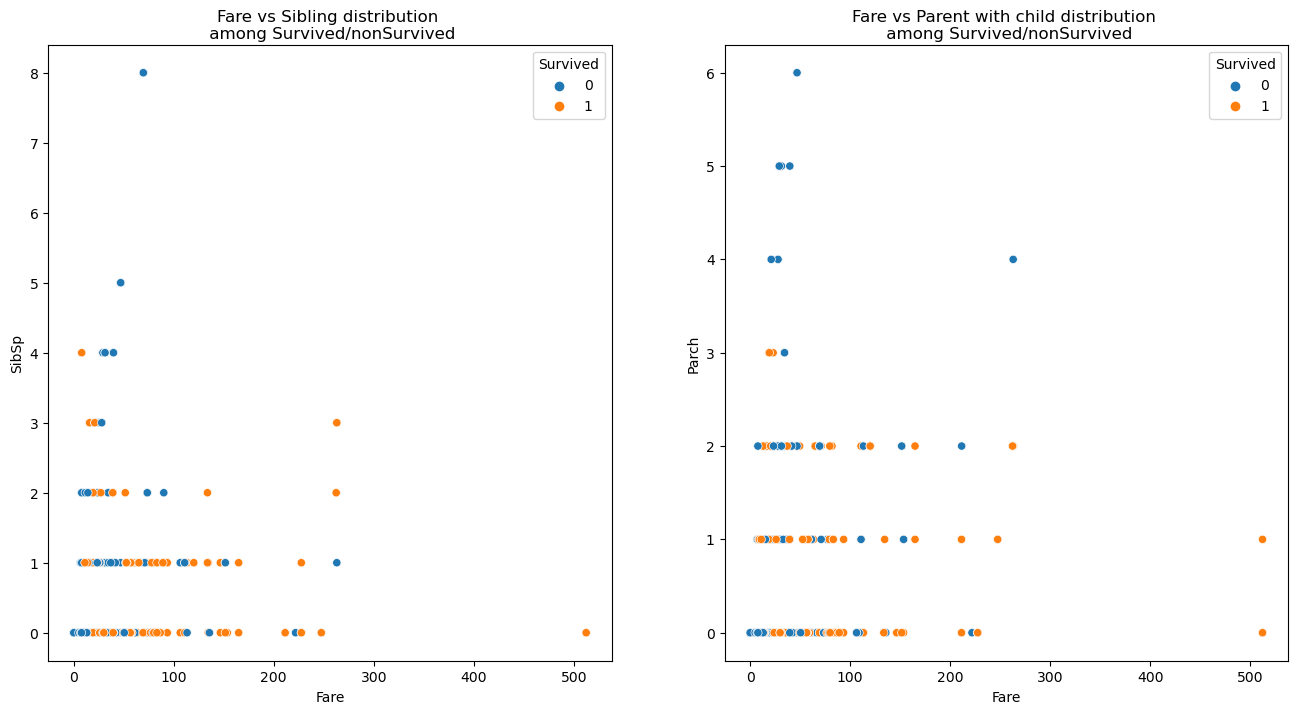

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

sns.scatterplot(ax=axes[0], x='Fare', y='SibSp', data=data, hue='Survived')
axes[0].set_title('Fare vs Sibling distribution \n among Survived/nonSurvived', fontsize=12, loc = 'center', wrap=True)
sns.scatterplot(ax=axes[1], x='Fare', y='Parch', data=data, hue='Survived')
axes[1].set_title('Fare vs Parent with child distribution \n among Survived/nonSurvived', fontsize=12, loc = 'center', wrap=True)


In [23]:
#print(data.mean())
#data_fill=data.fillna(data.mean()) ### replace nan value with he mean of the column
#data_fill.isna().sum()

Transformation & Pipeline 


In [24]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

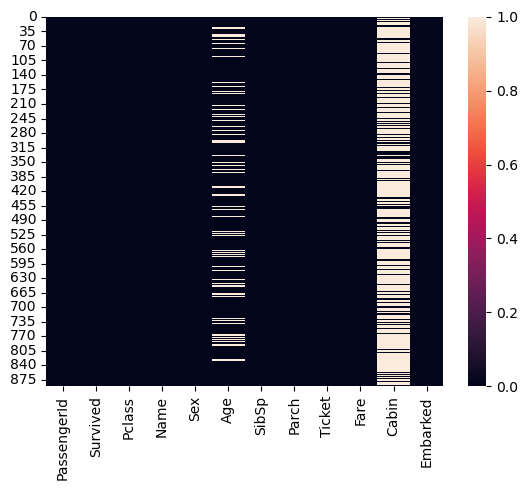

In [25]:
#Heatmap of missing value
sns.heatmap(data.isna())

In [26]:
# drop column that are not part of the workflow (Cabin, PassengerID, Ticket)
data.drop(columns=['Cabin','Ticket','PassengerId'], inplace=True)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Split data - Train / Test

In [27]:
#define X and Y
y=data['Survived']
X=data.drop('Survived', axis=1)

In [28]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

Feature engineering with Pipeline

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn import set_config
set_config(display="diagram") ###displays diagram from the output of the column/feature transformation
set_config(transform_output="pandas")

In [30]:
#Transform column using  pipeline /defining the pipeline to use on the data

In [31]:
##Categorical data
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),    # this one will transform categorical features
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
                         

In [32]:
##Numerical data
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),    #this one will transform numerical features and scale the output 
                         MinMaxScaler())

In [33]:
### Create custom function that go through the name and extract title (Mr, Mrs, Miss)

def name_length(df):
    length = df[df.columns[0]].str.len()
    return length.values.reshape(-1, 1)

In [34]:
#Tansform the column features of the data
column_transform = ColumnTransformer(     # we are combining num_pipe, cat_pipe, Function Transformer 
    transformers=[
        ("num", num_pipe, ['Age', 'Fare']),
        ("cat", cat_pipe, ['Pclass', 'Embarked', 'Parch','Sex']),
        ("name", FunctionTransformer(name_length), ['Name']),
        ("do_nothing", 'passthrough', ['SibSp'])
    ]

)#remainder='passthrough', 'drop'
#

In [35]:
#Transform categorical data 
#Factorize categorical column - 
#X_train_cat=X_train
#X_train_cat[['Pclass', 'Embarked', 'Parch','Sex']] = X_train_cat[['Pclass', 'Embarked', 'Parch','Sex']].apply(lambda x: pd.factorize(x)[0])

In [36]:
column_transform

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Pclass', 'Embarked', 'Parch', 'Sex']),
                                ('name',
                                 FunctionTransformer(func=<function name_length at 0x7f731df83160>),
                                 ['Name']),
                                ('do_nothing', 'passthrough', ['SibSp'])])

In [37]:
#creation of model pipeline - apply logistic regression on the feature we transformed 
# max iteration for the logisticRegression to search for optimum parameter

pipeline = make_pipeline(column_transform, LogisticRegression(max_iter=400))

In [38]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Pclass', 'Embarked',
                                                   'Parch', 'Sex']),
                                                 ('name',
                                                  FunctionTransformer(func=<function name_length at 0x7f731df83160>),
                                                  ['Name']),
                                                 ('do_nothing', 'passthrough',
                                                  ['SibSp'])])),
                ('logisticregression', LogisticRegression(max_iter=400))])

Train the model

In [39]:
#feed our data to transform and train the model
pipeline.fit(X_train, y_train)


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Pclass', 'Embarked',
                                                   'Parch', 'Sex']),
                                                 ('name',
                                                  FunctionTransformer(func=<function name_length at 0x7f731df83160>),
                                                  ['Name']),
                                                 ('do_nothing', 'passthrough',
                                                  ['SibSp'])])),
                ('logisticregression', LogisticRegression(max_iter=400))])

In [40]:
#X_train

In [41]:
#Check score / accuracy of the model 

In [42]:
#train data
pipeline.score(X_train, y_train)

0.797752808988764

In [43]:
#check model score using test data
pipeline.score(X_test, y_test)

0.7877094972067039

In [44]:
#Check model parameters
#

Do prediction with model parameter

In [45]:
# get predictions from the pipeline
y_pred = pipeline.predict(X_test) ###Predict y (survived or not) using Test data accuracy of that prediction will be to compare 
                                    #### y_test and y_pred
#y_pred

Evaluation of LogisticRegression output

In [46]:
##Transfom matrix to list
y_pred=y_pred.tolist()


In [47]:
#import the new list into dataframe ---
df1 = pd.DataFrame(y_pred, columns=['y_pred'])
#df1


In [48]:
#tranform y_test serie data to dataframe and reset the index
df_y_test=y_test.to_frame()
df_y_test.reset_index(inplace=True)
#df_y_test

In [49]:
#add y_pred and y_test into the same dataframe
df_y_test['y_pred']=df1['y_pred']
df_y_test

,index,Survived,y_pred
0,709,1,0
1,439,0,0
2,840,0,0
3,720,1,1
4,39,1,1
...,...,...,...
174,433,0,0
175,773,0,0
176,25,1,0
177,84,1,1


In [50]:
h=df_y_test.drop('index', axis=1)

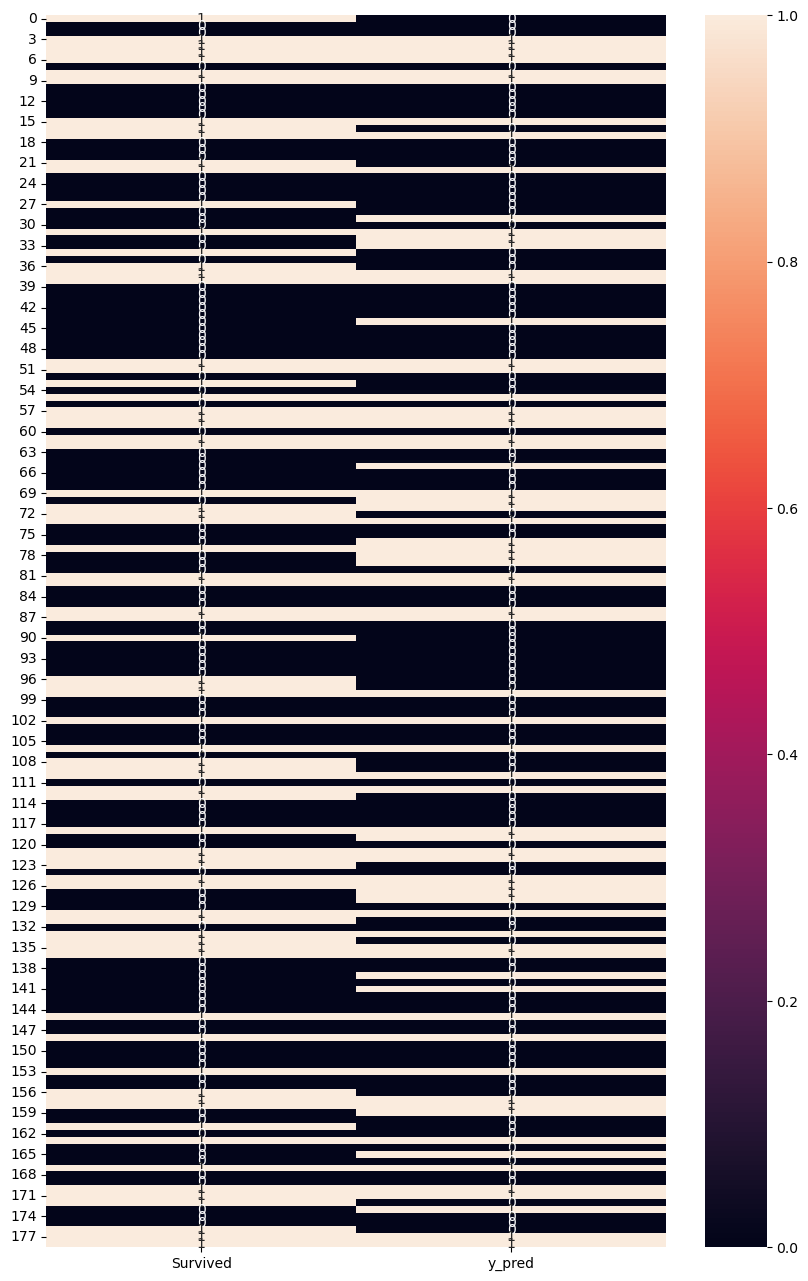

In [51]:
#create a heatmap of the y_test and y_pred

fig= plt.figure(figsize=(10, 16))
sns.heatmap(h, annot=True)
plt.show()



In [52]:

# get prediction probabilities from the pipeline 
proba = pipeline.predict_proba(X_test)


In [53]:

#proba

In [54]:
# access regression coefficient 
pipeline.named_steps['logisticregression'].coef_ ##what do the coefficients mean? how are they related to the input variables?

array([[-1.53738917,  0.61926705,  0.72608944,  0.18849398, -0.93769557,
         0.19310375,  0.15001847, -0.36623438,  0.24845016,  0.79384441,
         0.22703897,  0.59776913, -0.79056174, -0.75582395, -0.34382913,
         1.20023644, -1.2233486 ,  0.02572209, -0.35007931]])

In [55]:
# access regression intercept
pipeline.named_steps['logisticregression'].intercept_

array([-0.03230631])

In [56]:
#confusion matrix - does not work on pipeline - data need to transform separately then call the model on the transform data

In [57]:
column_transform

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Pclass', 'Embarked', 'Parch', 'Sex']),
                                ('name',
                                 FunctionTransformer(func=<function name_length at 0x7f731df83160>),
                                 ['Name']),
                                ('do_nothing', 'passthrough', ['SibSp'])])

In [58]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S
733,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S
382,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S
704,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S
813,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...,...
106,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,7.6500,S
270,1,"Cairns, Mr. Alexander",male,NaN,0,0,31.0000,S
860,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,14.1083,S
435,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,120.0000,S


In [59]:
#Transformation of the data
X_train_trans= column_transform.fit_transform(X_train)
X_train_trans


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
331,0.566474,0.055628,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0
733,0.283740,0.025374,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,0.0
382,0.396833,0.015469,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0
704,0.321438,0.015330,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,1.0
813,0.070118,0.061045,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.258608,0.014932,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,0.0
270,0.365404,0.060508,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,0.0
860,0.509927,0.027538,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,2.0
435,0.170646,0.234224,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,1.0


In [60]:
#transform X_test data but Transforming X_test without fitting the transformer on it!!!
X_test_trans = column_transform.transform(X_test)


In [61]:
#X_test_trans

In [62]:
#call the Logistic_regeression on transform data
mod = LogisticRegression(max_iter=400)


In [63]:
mod.fit(X_train_trans, y_train)

LogisticRegression(max_iter=400)

In [64]:
#compare the score from previous method
mod.score(X_train_trans, y_train)

0.797752808988764

In [65]:
mod.score(X_test_trans, y_test)

0.7877094972067039

In [66]:
#Precision 
metrics.precision_score(y_test, y_pred)

0.7571428571428571

In [67]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [68]:
#model coefficient
mod.coef_

array([[-1.53738917,  0.61926705,  0.72608944,  0.18849398, -0.93769557,
         0.19310375,  0.15001847, -0.36623438,  0.24845016,  0.79384441,
         0.22703897,  0.59776913, -0.79056174, -0.75582395, -0.34382913,
         1.20023644, -1.2233486 ,  0.02572209, -0.35007931]])

In [69]:
#model intercept
mod.intercept_

array([-0.03230631])

In [70]:
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                         display_labels=mod.classes_)

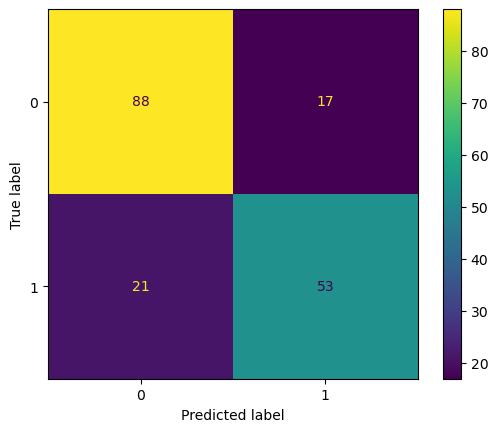

In [71]:
cm_disp.plot()

In [72]:
##ROC curve

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay



In [74]:
#Estimation of fals positive and true positive
#fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=mod.classes_[1])
y_score = mod.decision_function(X_test_trans)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=mod.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='logistic regression')

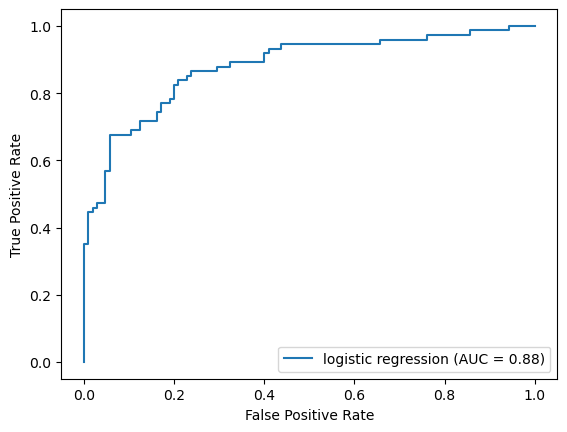

In [75]:
#Display graph
#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_disp.plot()

In [76]:
###Try logistic Regression without OneHotEncoder - instead use labelEncode or pd.factorize() to transform categorical data

In [77]:
#Transform categorical in Train data
X_train_log=X_train
X_train_log[['Pclass', 'Embarked', 'Parch','Sex']] = X_train_log[['Pclass', 'Embarked', 'Parch','Sex']].apply(lambda x: pd.factorize(x)[0])

In [78]:
X_train_log

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
331,0,"Partner, Mr. Austen",0,45.5,0,0,28.5000,0
733,1,"Berriman, Mr. William John",0,23.0,0,0,13.0000,0
382,2,"Tikkanen, Mr. Juho",0,32.0,0,0,7.9250,0
704,2,"Hansen, Mr. Henrik Juul",0,26.0,1,0,7.8542,0
813,2,"Andersson, Miss. Ebba Iris Alfrida",1,6.0,4,1,31.2750,0
...,...,...,...,...,...,...,...,...
106,2,"Salkjelsvik, Miss. Anna Kristine",1,21.0,0,0,7.6500,0
270,0,"Cairns, Mr. Alexander",0,NaN,0,0,31.0000,0
860,2,"Hansen, Mr. Claus Peter",0,41.0,2,0,14.1083,0
435,0,"Carter, Miss. Lucile Polk",1,14.0,1,1,120.0000,0


In [79]:
#X_train

In [80]:
##Transform numerical variable (assign mean value to the missing value)

In [81]:
X_train_log.isna().sum()

Pclass        0
Name          0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [82]:
X_train_log[['Name']]=name_length(X_train_log[['Name']])
#X_train_log

In [83]:
#Fill missing value by mean of the coulmn
X_train_log.fillna(X_train_log.mean(), inplace=True)


In [84]:
#X_train_log

In [85]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
331,0,19,0,45.500000,0,0,28.5000,0
733,1,26,0,23.000000,0,0,13.0000,0
382,2,18,0,32.000000,0,0,7.9250,0
704,2,23,0,26.000000,1,0,7.8542,0
813,2,34,1,6.000000,4,1,31.2750,0
...,...,...,...,...,...,...,...,...
106,2,32,1,21.000000,0,0,7.6500,0
270,0,21,0,29.498846,0,0,31.0000,0
860,2,23,0,41.000000,2,0,14.1083,0
435,0,25,1,14.000000,1,1,120.0000,0


In [86]:
#X_train

In [87]:
#Transform Categorical and Numerical in X_test data 

In [88]:
X_test_log=X_test
#X_test_log=X_test_log.drop(columns=['Name'])
X_test_log[['Name']]=name_length(X_test_log[['Name']])


In [89]:
X_test_log.fillna(X_train_log.mean(), inplace=True)

In [90]:
# when applying factorize function it return binary output 0, 1 -- consequence : one classe in Cabine classe are lost (1, 2 ,3) --
# Better use OneHoteEncoder to transform data
X_test_log[['Pclass', 'Embarked', 'Parch','Sex']] = X_test_log[['Pclass', 'Embarked', 'Parch','Sex']].apply(lambda x: pd.factorize(x)[0])

In [91]:
X_test_log['Pclass'].value_counts()

0    93
2    53
1    33
Name: Pclass, dtype: int64

In [92]:
#

In [93]:
### call logistic regression

In [94]:
log_m = LogisticRegression(max_iter=400)

In [95]:
log_m.fit(X_train_log, y_train)

LogisticRegression(max_iter=400)

In [96]:
log_m.coef_

array([[-9.45125986e-01,  2.61500995e-02,  2.34830331e+00,
        -3.28870941e-02, -3.71377805e-01,  3.11209287e-02,
         2.26900200e-03,  3.10456894e-01]])

In [97]:
##score of the model - train, test data

In [98]:
log_m.score(X_train_log, y_train)

0.7949438202247191

In [99]:
log_m.score(X_test_log, y_test)

0.6312849162011173

In [100]:
# get predictions from the pipeline
y_pred_log = log_m.predict(X_test_log)

In [101]:
# Confusion matrix 
cm_log = metrics.confusion_matrix(y_test, y_pred_log)

In [102]:
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_log,
                                         display_labels=log_m.classes_)

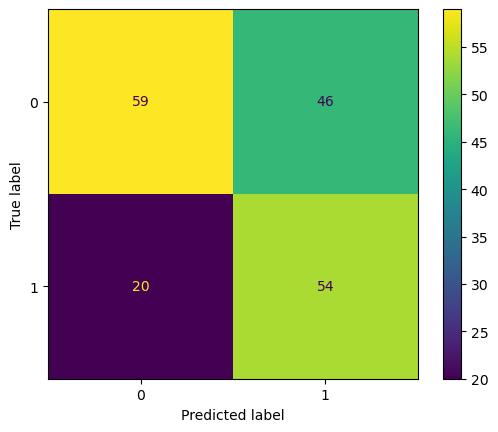

In [103]:
cm_plot.plot()

In [104]:
# Precision
#Precision 
metrics.precision_score(y_test, y_pred_log)

0.54

In [105]:
#Estimation of fals positive and true positive
#fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=mod.classes_[1])
y_score = log_m.decision_function(X_test_log)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=mod.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='logistic regression')

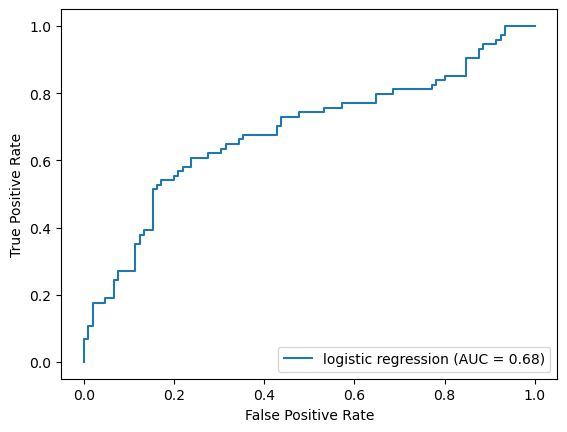

In [106]:
roc_disp.plot()

Apply Decision Tree on Titanic Data

In [107]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from IPython.display import IFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder


In [108]:
#if you set set_config(transform_output="pandas") - then the data will organised in a dataframe
#X_train_test=column_transform.fit_transform(X_train)
#X_train_test

In [109]:
#Split data into train and test 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((712, 8), (179, 8), (712,), (179,))

In [110]:
##Categorical data
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),    # this one will transform categorical features
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

In [111]:
##Numerical data
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),    #this one will transform numerical features and scale the output 
                         MinMaxScaler())

In [112]:
#Factorize categorical column - 
#X_train1[['Pclass', 'Embarked', 'Parch','Sex']] = X_train1[['Pclass', 'Embarked', 'Parch','Sex']].apply(lambda x: pd.factorize(x)[0])

In [113]:
#X_train1

In [114]:
#Tansform the column features of the data - numerical data and name
column_transform1 = ColumnTransformer(     # we are combining num_pipe, cat_pipe, Function Transformer 
    transformers=[
        ("num", num_pipe, ['Age', 'Fare']),
        ("name", FunctionTransformer(name_length), ['Name']),
        ("do_nothing", 'passthrough', ['SibSp'])
    ]

)#remainder='passthrough', 'drop'
#

In [115]:
#transform train data - after factorize() categorical colum- using column transform define early
X_train_t= column_transform1.fit_transform(X_train1)

In [116]:
X_test_t = column_transform1.transform(X_test1)

In [117]:
#transform X_test data but Transforming X_test without fitting the transformer on it!!!
#X_test_tr = column_transform1.transform(X_test)
#X_test_tr 

In [118]:
#df[['col1', 'col3']] = df[['col1', 'col3']].apply(lambda x: pd.factorize(x)[0])

In [119]:
#call the decision tree classifier form scikit learn

m = DecisionTreeClassifier(max_depth=5)

In [120]:
#Train the model 
m=m.fit(X_train_t, y_train1)
m

DecisionTreeClassifier(max_depth=5)

In [121]:
# show score of the model
m.score(X_train_t,y_train1)

0.7963483146067416

In [122]:
# show score of the model on test data
m.score(X_test_t, y_test1)

0.7206703910614525

In [123]:
#model coefficient

In [124]:
# Make prediction 
y_pr = m.predict(X_test_t)

In [125]:
# accuracy between test data and prediction output
metrics.accuracy_score(y_test1, y_pr)

0.7206703910614525

In [126]:
#Precision 
metrics.precision_score(y_test1, y_pr)

0.7307692307692307

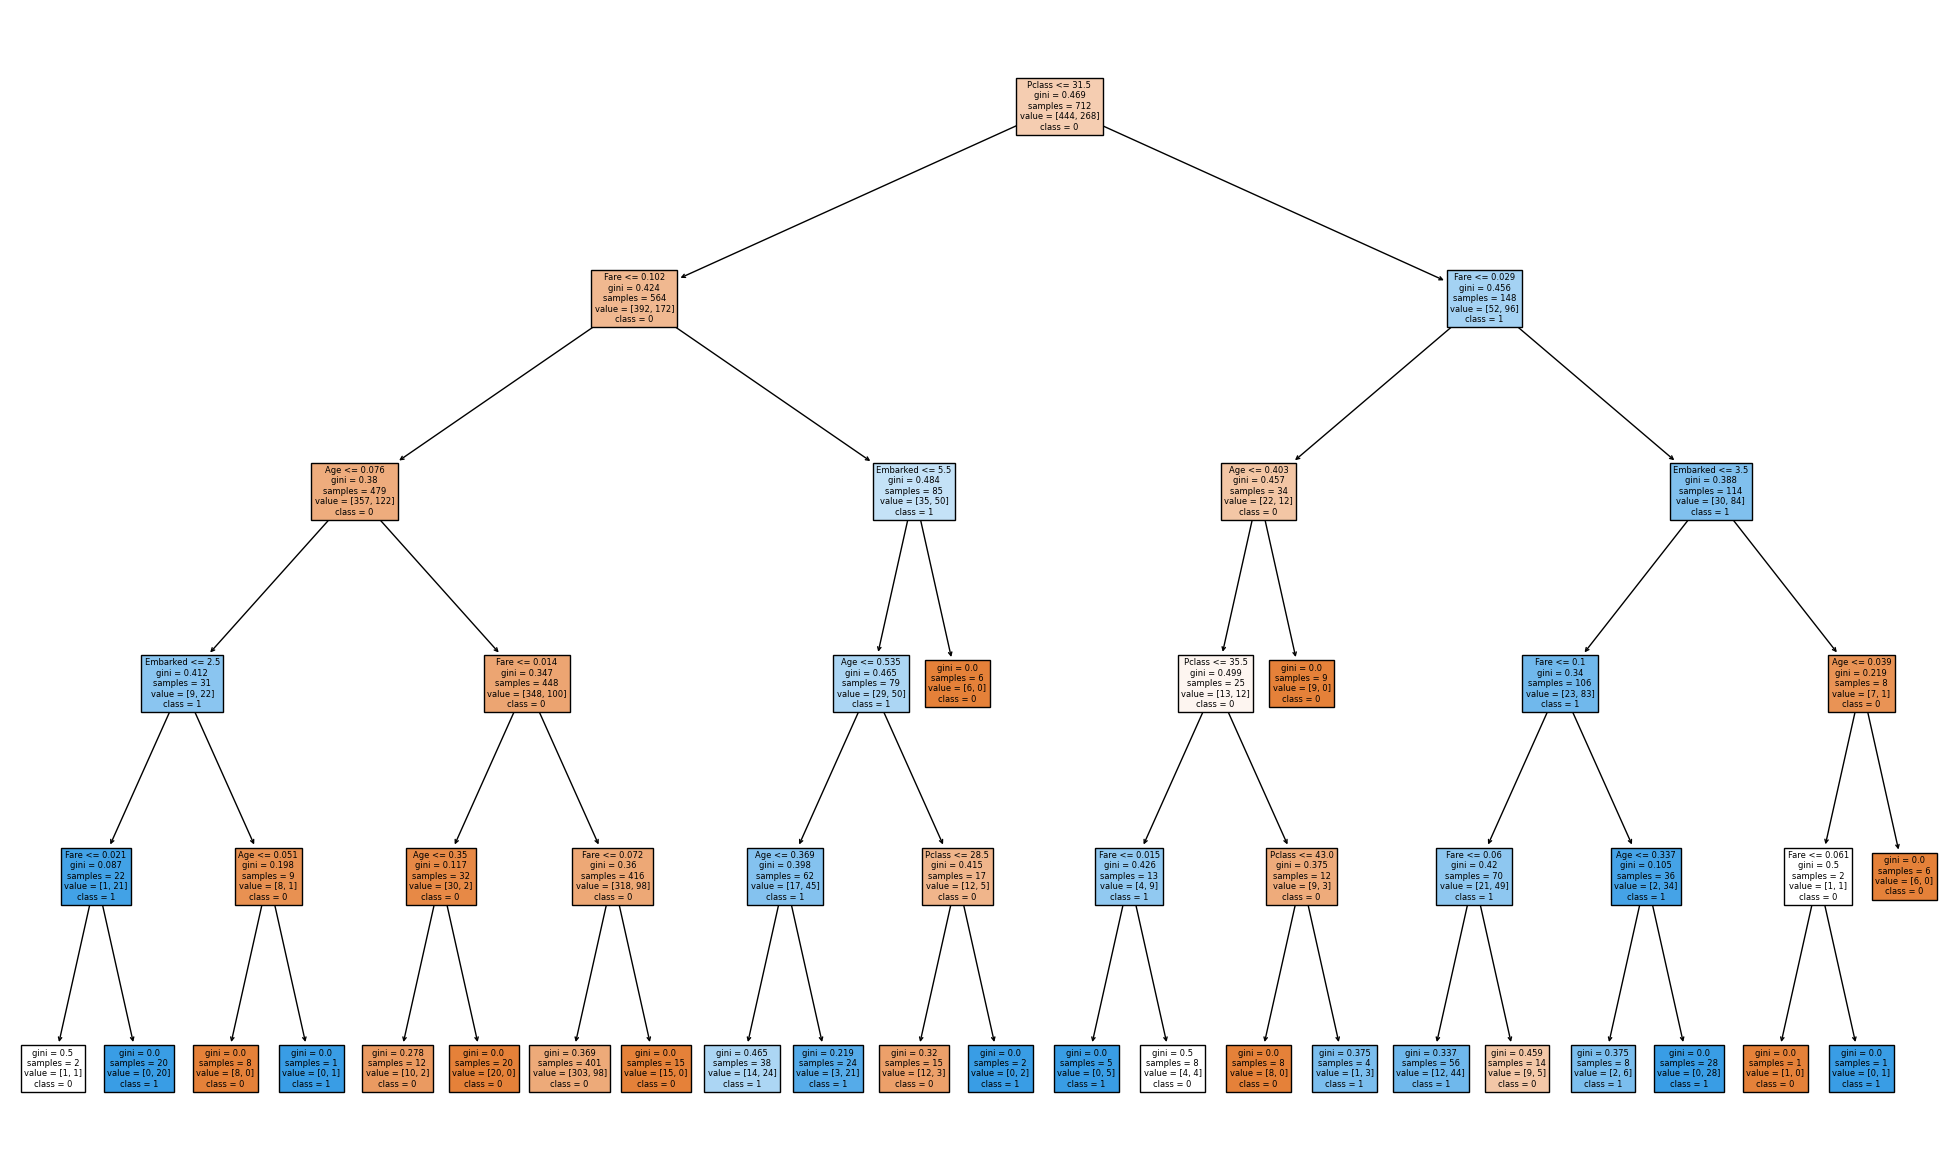

In [127]:
#Plot the tree
plt.figure(figsize=(25,15))
t = plot_tree(m, feature_names = ['Age', 'Fare','Pclass', 'Embarked', 'Parch','Sex','Name','SibSp'], class_names = ["0", "1"], filled=True)

In [128]:
##Confusion_Matrix

In [129]:
cm1 = metrics.confusion_matrix(y_test1, y_pr)

In [130]:
cm_disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,
                                         display_labels=m.classes_)

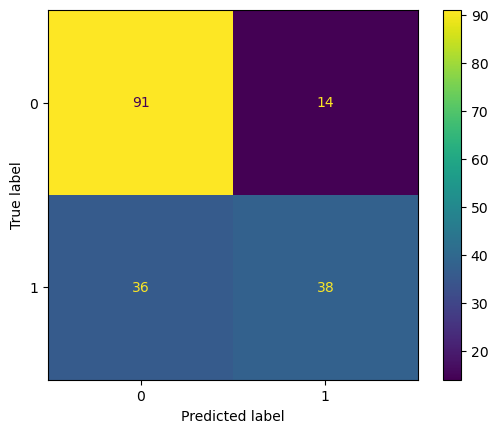

In [131]:
cm_disp1.plot()

In [132]:
#Estimation of fals positive and true positive
fpr, tpr, thresholds= roc_curve(y_test1, y_pr, pos_label=m.classes_[1])

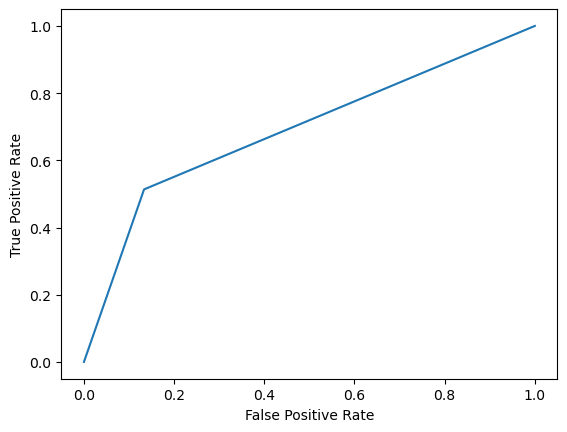

In [133]:
#Display graph
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Random forest classifer

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=120)   

In [180]:
rfc.fit(X_train_t, y_train1)

RandomForestClassifier(max_depth=5, n_estimators=120)

In [181]:
round(rfc.score(X_train_t, y_train1),3)

0.81

In [182]:
round(rfc.score(X_test_t, y_test1),3)

0.749

In [183]:
#rfc.predict_proba(X_test_log)

In [184]:
y_pd = rfc.predict(X_test_t)

In [185]:
#Precision 
metrics.precision_score(y_test1, y_pd)

0.7843137254901961

In [186]:
##Confusion_Matrix

In [187]:
cmx = metrics.confusion_matrix(y_test1, y_pd)

In [188]:
cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix=cmx,
                                         display_labels=m.classes_)

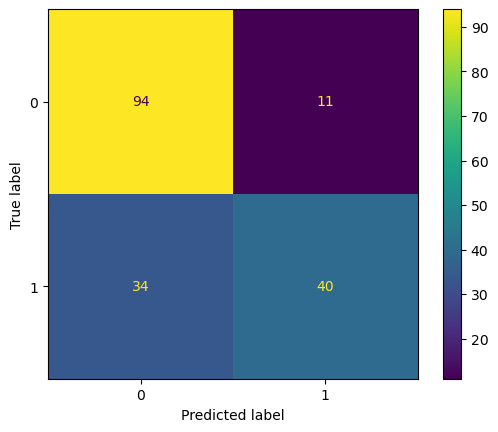

In [189]:
cm_dis.plot()

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [190]:
#Estimation of fals positive and true positive
fpr, tpr, thresholds= roc_curve(y_test1, y_pd, pos_label=m.classes_[1])

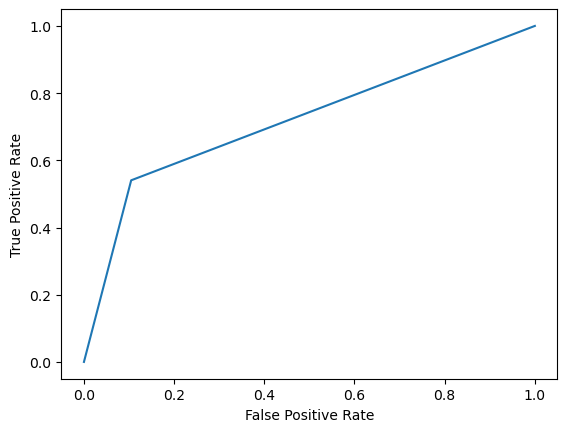

In [191]:
#Display graph
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)

feature_transform = ColumnTransformer([
   ('do_nothing', 'passthrough', ['sample_number']),
    ('cat_preprocessing', cat_pipe, ['island', 'region', 'sex']),
    ('num_preprocessing', num_pipe, ['body_mass_g','culmen_length_mm'])
])

#IMPORTANT!!
X_train_trans = feature_transform.fit_transform(X_train).  #we are fitting and then transforming X_train

dm = DummyClassifier(strategy= 'most_frequent')
dm.fit(X_train_trans, y_train).    #You are fitting the model on X_train_trans
## IMPORTANT!!!!
X_test_trans = feature_transform.transform(X_test)  #Transforming X_test but not fitting the transformer on it!!!

In [146]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female

data_fill.isna().sum()

In [147]:
## Given the data of a new passenger, we want to predict whether they will survive the disaster.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [148]:
# define Y and X variable 

X = data_fill[['Pclass','Age', 'Sex', 'SibSp', 'Parch', 'Fare']]
y = data_fill['Survived']

X.dtypes

In [149]:
#split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#value for normalizing train and test data
X_mean = X_train.mean()
X_std = X_train.std()

In [150]:
#Normalization of the data before modeling

X_train = (X_train-X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [151]:
#X_train.describe(include='O')

X_test.describe()

In [152]:
# classification using logistic regression model

m = LogisticRegression()

In [153]:
### fit/train train_data

m.fit(X_train, y_train)

In [154]:
###display model coefficients 


m.coef_, m.intercept_